In [1]:
# origin image
import numpy as np
from PIL import Image
img = Image.open('lena.bmp')
img_array = np.array(img)
Image.fromarray(img_array)
Image.fromarray(img_array).save('lena.jpg')

In [2]:
# 用來顯示圖片的函數
from IPython.display import display
def show(img_array):
    display(Image.fromarray(img_array))

In [9]:
img_b_array = np.uint8(np.copy(img_array)>=128)*255

In [15]:
def down_sample(img_array,row,col):
    length = img_array.shape[0] 
    img_d_array = np.zeros((int(length/row),int(length/col)))
    for i in range(0,length,row):
        for j in range(0,length,col):
            img_d_array[int(i/row)][int(j/col)] = img_array[i][j]
    return img_d_array

In [46]:
img_d_array = np.uint8(down_sample(img_b_array,8,8))

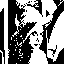

In [47]:
show(img_d_array)

In [48]:
def h(b,c,d,e):
    if(b != c):
        return 's'
    elif(b == c and (d!=b or e!= c)):
        return 'q'
    else:
        return 'r'

In [71]:
def Yokoi(img_array):
    length = img_array.shape[0]
    img_temp = np.zeros((length+2,length+2))
    img_temp[1:length+1,1:length+1] += img_array
    
    img_yok = np.zeros((length,length))
    dic = {'q':0,'r':0,'s':0}
    
    for i in range(1,length+1,1):
        for j in range(1,length+1,1):
            if(img_temp[i][j] != 0):
                dic[h(img_temp[i][j],img_temp[i+1][j],img_temp[i+1][j-1],img_temp[i][j-1])] += 1
                dic[h(img_temp[i][j],img_temp[i][j-1],img_temp[i-1][j-1],img_temp[i-1][j])] += 1
                dic[h(img_temp[i][j],img_temp[i-1][j],img_temp[i-1][j+1],img_temp[i][j+1])] += 1
                dic[h(img_temp[i][j],img_temp[i][j+1],img_temp[i+1][j+1],img_temp[i+1][j])] += 1

                if(dic['r'] == 4):
                    img_yok[i-1][j-1] = 5
                else:
                    img_yok[i-1][j-1] = dic['q']

                for key in dic.keys():
                    dic[key] = 0
    return img_yok
    

In [72]:
img_yok = np.uint8(Yokoi(img_d_array))

In [73]:
img_yok

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 5, 5, ..., 0, 0, 0],
       [1, 5, 5, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [74]:
def display_Yokoi(img_array):
    length = img_array.shape[0]
    for i in range(length):
        for j in range(length):
            if(img_array[i][j] == 0):
                print(" ",end = '')
            else:
                print(img_array[i][j],end = '')
        print('')

In [75]:
display_Yokoi(img_yok)

11111111        12111111111122322221     111111111111           
15555551         115555555511 2 11  11   1155555555511          
15555551        1 2115555112  21112221    155555555551      21  
15555551        1 2 155112 22221511       1555555555511     1   
15555551         22 2112 22    121        15555555555511        
15555551         1  2  21 2     1   1     15555555555551        
15555551           12 1  121111    1321   155555555555511       
15111551           1322 1155551111        155555555555551       
111 1551            1  121555555511       155555555555511       
11  1551                 21155555511      15511155555511        
21  1551                 2 15555555111    1551 11555511         
1   1551                 2 155555555511   1551  115551         1
    1551               1121155555555551   1551   15511        12
    1551               15555555555555511  1551   1111        111
    1551        1     2221155555555555511 1151    11        1151
    1551        2    22 1

In [80]:
with open('Output.txt','w') as file:
    length = img_yok.shape[0]
    for i in range(length):
        for j in range(length):
            if(img_yok[i][j] == 0):
                file.write(" ") 
            else:
                file.write(str(img_yok[i][j]))
        file.write('\n')        

In [81]:
img_yok.shape

(64, 64)